In [410]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
#gettting current working directory using os.getcwd
cwd=os.getcwd()
cwd

'F:\\Assignment'

<h1>Assignment 1A</h1>
<h3>In this part we will analyse the Following things.</h3>
<ol>
    <li>Average Growth of states over duration 2013-14,2014-15,2015-16</li>
    <li>We will also identify which states have high total GDP and which are at the bottom</li>
</ol>

In [411]:
#Reading data from CSV file named as 1A into data frame Data_1A
data_1a=pd.read_csv(cwd+"\\data\\1_A\\1A.csv")
data_1a.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [412]:
#Renaming column Items Description
k=list(data_1a.columns)
k[0]="Description"
data_1a.columns=k

In [413]:
data_1a.head(2)

,Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0


In [414]:
#Extracting % growth over previous year data and removing all data for year 2016-17
grth_p_df=data_1a.loc[(data_1a.Duration!="2016-17")&(data_1a.Description=="(% Growth over previous year)") ]
grth_p_df.head()

,Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [415]:
#Dropping Description Column since it is not needed
grth_p_df=grth_p_df.drop("Description",axis=1)
grth_p_df.head()

,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
6,2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [416]:
#Setting index as Duration
grth_p_df.set_index("Duration",inplace=True)
grth_p_df.head()


,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
Duration,,,,,,,,,,,,,,,,,,,,,
2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,11.31,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,17.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [417]:
#Since columns are much more and rows are few it would be better to transpose the dataframe.Also we wanna look each data
#state wise transposing will give us a much better understanding of each state 
grth_p_df=grth_p_df.transpose()

In [418]:
#Setting index name as states
grth_p_df.index.name="States"
grth_p_df.head()

Duration,2012-13,2013-14,2014-15,2015-16
States,,,,
Andhra Pradesh,8.43,12.85,13.40,15.85
Arunachal Pradesh,13.41,16.38,14.79,12.07
Assam,9.56,13.31,11.45,13.19
Bihar,14.25,12.30,17.92,10.59
Chhattisgarh,12.30,16.44,13.69,10.98


In [419]:
#checking for null values of each state
grth_p_df.isnull().sum(axis=1)

States
Andhra Pradesh               0
Arunachal Pradesh            0
Assam                        0
Bihar                        0
Chhattisgarh                 0
Goa                          0
Gujarat                      0
Haryana                      0
Himachal Pradesh             1
Jammu & Kashmir              0
Jharkhand                    0
Karnataka                    0
Kerala                       0
Madhya Pradesh               0
Maharashtra                  1
Manipur                      1
Meghalaya                    0
Mizoram                      1
Nagaland                     1
Odisha                       0
Punjab                       1
Rajasthan                    1
Sikkim                       0
Tamil Nadu                   0
Telangana                    0
Tripura                      1
Uttar Pradesh                0
Uttarakhand                  0
West Bengal1                 4
Andaman & Nicobar Islands    1
Chandigarh                   0
Delhi                        0
P

In [420]:
#In the above output we observed that west bengal has no data for any year so we must drop it from our analysis
grth_p_df=grth_p_df.drop("West Bengal1",axis=0)

In [421]:
#checking for null values in each column
grth_p_df.isnull().sum(axis=0)

Duration
2012-13    0
2013-14    0
2014-15    0
2015-16    9
dtype: int64

In [422]:
#In above output we saw that that year 2015-16 data for some states is missing.
#To make our analysis smooth we have decided to impute these values with mean of all previous years.
grth_p_df.loc[np.isnan(grth_p_df["2015-16"]),"2015-16"]=grth_p_df.loc[np.isnan(grth_p_df["2015-16"]),:].mean(axis=1)

In [423]:
#Rounding up values in growth percentage data frame up to 2 decimal points
grth_p_df=grth_p_df.apply(lambda x:round(x,2))

In [424]:
#Calculating avg growth rate for years 2013-14,2014-15,2015-16
grth_p_df["Avg_Growth_Rate"]=grth_p_df.loc[:,["2013-14","2014-15","2015-16"]].mean(axis=1)

In [425]:
#Rounding off the values to 2 decimal points 
grth_p_df=grth_p_df.apply(lambda x:round(x,2))
grth_p_df.head()

Duration,2012-13,2013-14,2014-15,2015-16,Avg_Growth_Rate
States,,,,,
Andhra Pradesh,8.43,12.85,13.40,15.85,14.03
Arunachal Pradesh,13.41,16.38,14.79,12.07,14.41
Assam,9.56,13.31,11.45,13.19,12.65
Bihar,14.25,12.30,17.92,10.59,13.60
Chhattisgarh,12.30,16.44,13.69,10.98,13.70


In [426]:
#Sorting the data frame based on avg growth values in ascending order
grth_p_df.sort_values(by="Avg_Growth_Rate",inplace=True)
grth_p_df.head()

Duration,2012-13,2013-14,2014-15,2015-16,Avg_Growth_Rate
States,,,,,
Goa,-10.02,-5.77,13.12,10.75,6.03
Meghalaya,9.81,4.87,6.41,9.58,6.95
Odisha,13.34,12.95,10.37,6.19,9.84
Sikkim,10.51,12.35,9.72,9.39,10.49
Jammu & Kashmir,11.31,10.09,4.70,17.91,10.90


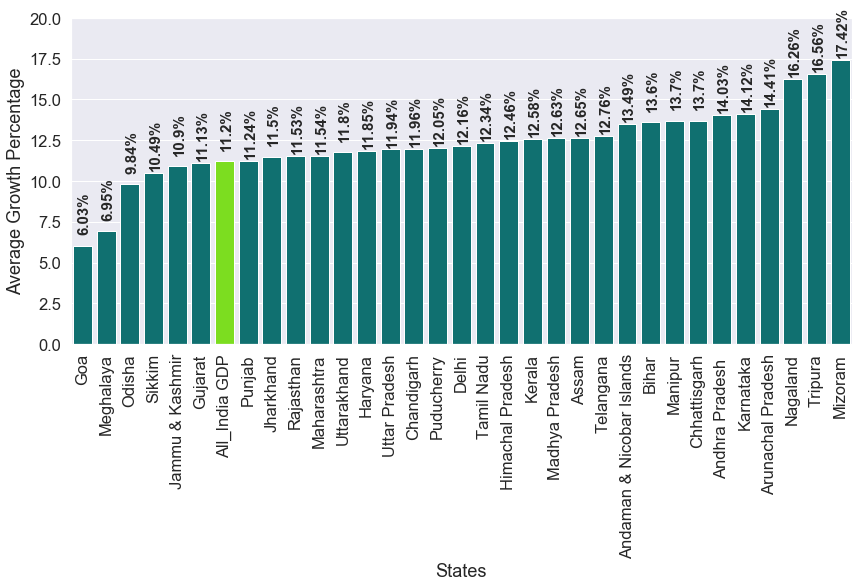

In [467]:
#Plotting a bar chart for avg growth percentage

#Setting figure size
plt.figure(figsize=(14,6))

#Setting font scale to make values readable
sns.set(font_scale = 1.5)

#Making a color palette so that all india gdp is highlighted as teal and other states as green
colrs = ['teal' if (v != "All_India GDP") else 'lawngreen' for v in grth_p_df.index ]

#plotting a bargraph with states on x axis and average percentage growth values on y axis
ax=sns.barplot(y=grth_p_df.Avg_Growth_Rate,x=grth_p_df.index,palette=colrs)

#Annotating each bar with corresponding value
for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+2.6,str(i.get_height())+"%", fontsize=15,rotation=90,weight="bold")
plt.xlabel("States")
plt.ylabel("Average Growth Percentage")
plt.ylim((0,20))
plt.xticks(rotation=90)
plt.show()


<h1>Observations</h1>
<ul><li>Based on the chart above we can say that states like Mizoram,Tripura,Nagaland are consistently growing fast.</li>
    <li>States like Goa,Meghalaya,Odisha are struggling</li>

<h1>Curoisity Excercise</h1>
<p>My home state is Rajasthan.Its avg growth rate is 11.53% which is approximately equal to national average growth rate 11.2%</p> 

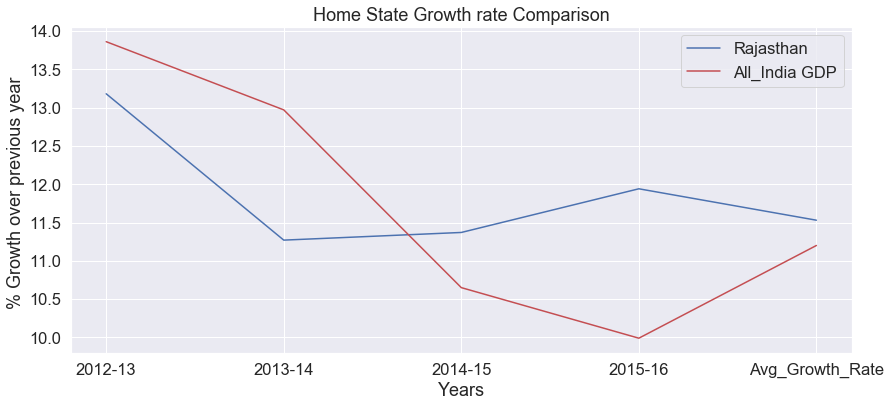

In [428]:
#Plotting a line chart for avg growth rate percentage of rajasthan and All india for different years 

#Setting figure size
plt.figure(figsize=(14,6))

#Setting font scale to make values readable
sns.set(font_scale = 1.5)
#Extracting values from the main data frame
temp=grth_p_df.loc[["Rajasthan","All_India GDP"]]
#Transposing the values so that year appear as rows and states as columns
temp=temp.transpose()
#We have to make x axis as different years so extracting years from temp data frame
x=temp.index

#Extracting values of Rajasthan and All india in y1 and y2
y1=temp["Rajasthan"].values
y2=temp["All_India GDP"].values
#Plotting lines
plt.plot(x, y1, '-b', label='Rajasthan')
plt.plot(x, y2, '-r', label='All_India GDP')
#Setting labels,title and legends 
plt.legend(loc='upper right')
plt.xlabel("Years")
plt.ylabel("% Growth over previous year ")
plt.title("Home State Growth rate Comparison")
plt.show()



<h2>Analysis</h2>
<br>We can see that the growth rate of Rajasthan follows almost the same trend as All India.Although there is a significant difference in growth rate but avg growth rate for all years is almost equal

<h1>Objective</h1>

Now we will plot the Total GDP of all states for year 2015-16 and identify top-5 and bottom-5 states

<h2>Approach</h2>
<ul><li>First we will read the data from the original data frame and store it in a new data frame</li>
<li>Now we will isolate the GSDP-Current prices for all the states</li>
<li>We have already seen that West Bengal doesn't have any data so we will drop it</li>
<li>We also know that some some states have missing value for year 2015-16.So we will impute those values by calculating the mean of GDP of that state of all the previous years </li>
<li>Once the data frame is preparedwe will now plot a bar chart states vs GDP values for year 2015-16</li>

In [429]:
#Reading data from the original data frame
gdp_price=data_1a

#Extracting only those columns where GSDP is present
gdp_price=gdp_price.loc[gdp_price.Description=="GSDP - CURRENT PRICES (` in Crore)"]

#Dropping Description columns since it contains same value for all rows it serves no purpose
gdp_price=gdp_price.drop("Description",axis=1)

#Setting duration as index
gdp_price=gdp_price.set_index("Duration")

In [430]:
#Transposing the dataframe so that states become rows and GSDP values for each year become columns
gdp_price=gdp_price.transpose()

In [431]:
#Seeing how our data frame looks
gdp_price.head()

Duration,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
Andhra Pradesh,379402.0,411404.0,464272.0,526468.0,609934.0,699307.0
Arunachal Pradesh,11063.0,12547.0,14602.0,16761.0,18784.0,NaN
Assam,143175.0,156864.0,177745.0,198098.0,224234.0,NaN
Bihar,247144.0,282368.0,317101.0,373920.0,413503.0,NaN
Chhattisgarh,158074.0,177511.0,206690.0,234982.0,260776.0,290140.0


In [432]:
#DRopping all values for year 2016-17 because they are not to be included in analysis
gdp_price.drop("2016-17",inplace=True,axis=1)

#Dropping West Bengal since it has no data available
gdp_price.drop("West Bengal1",inplace=True,axis=0)
gdp_price

Duration,2011-12,2012-13,2013-14,2014-15,2015-16
Andhra Pradesh,379402.0,411404.0,464272.0,526468.0,609934.0
Arunachal Pradesh,11063.0,12547.0,14602.0,16761.0,18784.0
Assam,143175.0,156864.0,177745.0,198098.0,224234.0
Bihar,247144.0,282368.0,317101.0,373920.0,413503.0
Chhattisgarh,158074.0,177511.0,206690.0,234982.0,260776.0
Goa,42367.0,38120.0,35921.0,40633.0,45002.0
Gujarat,615606.0,724495.0,807623.0,895027.0,994316.0
Haryana,297539.0,347032.0,400662.0,437462.0,485184.0
Himachal Pradesh,72720.0,82820.0,94764.0,104369.0,NaN
Jammu & Kashmir,78254.0,87105.0,95893.0,100404.0,118387.0


In [433]:
#Imputng missing values for year 2015-16 with mean of all previous years
gdp_price.loc[np.isnan(gdp_price["2015-16"]),"2015-16"]=gdp_price.loc[np.isnan(gdp_price["2015-16"]),:].mean(axis=1)

In [434]:
#Sorting the data frame based on GSDP values for year 2015-16 
gdp_price=gdp_price.sort_values(by="2015-16")
gdp_price

Duration,2011-12,2012-13,2013-14,2014-15,2015-16
Andaman & Nicobar Islands,3979.0,4421.0,5159.0,5721.0,4820.00
Mizoram,7259.0,8362.0,10293.0,11559.0,9368.25
Nagaland,11839.0,13619.0,16612.0,18414.0,15121.00
Manipur,12915.0,13748.0,16198.0,18043.0,15226.00
Sikkim,11165.0,12338.0,13862.0,15209.0,16637.00
Arunachal Pradesh,11063.0,12547.0,14602.0,16761.0,18784.00
Tripura,19208.0,21663.0,25593.0,29667.0,24032.75
Puducherry,16818.0,18875.0,21870.0,24089.0,26533.00
Meghalaya,19918.0,21872.0,22938.0,24408.0,26745.00
Chandigarh,18768.0,21609.0,24787.0,27844.0,30304.00


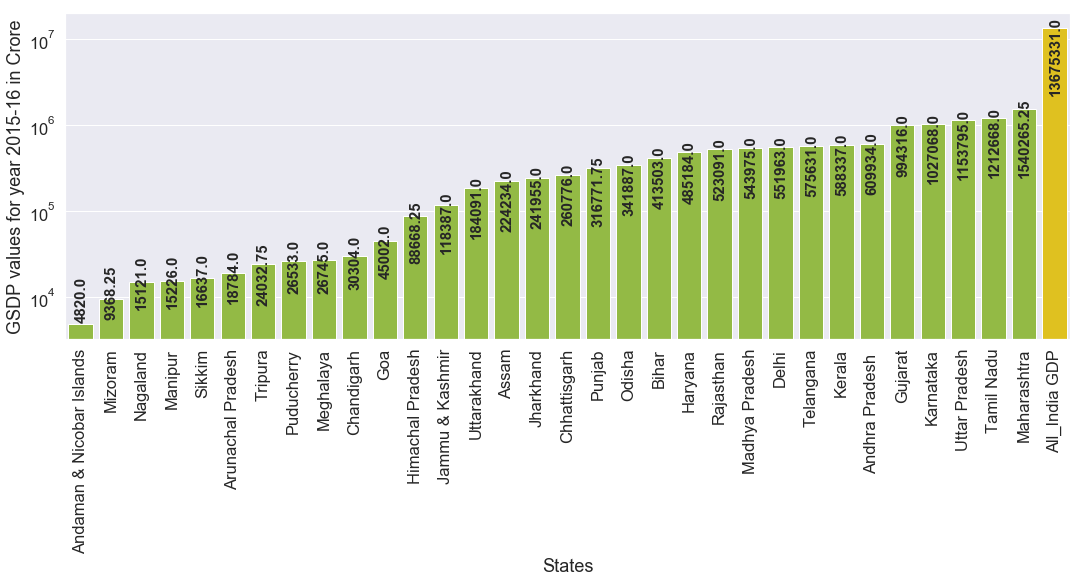

In [435]:
#Plotting the bar chart for GSDP
#Setting Figure size
plt.figure(figsize=(18,6))

#setting Font scale for better readibility
sns.set(font_scale = 1.5)

#Making a color palette so that ALL india GDP can be highlighted differently
colrs = ['yellowgreen' if (v != "All_India GDP") else 'gold' for v in gdp_price.index ]

#Plotting the bar chart
ax=sns.barplot(y=gdp_price["2015-16"],x=gdp_price.index,palette=colrs)

#Annotating the bars with values
for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+8000,str(i.get_height()), fontsize=15,rotation=90,weight="bold")

#Since the difference in values is very large it is difficult to plot them so we have changed the y scale to log for better anaysis
plt.yscale("log")

#Labelling x and y axis
plt.ylabel("GSDP values for year 2015-16 in Crore")
plt.xlabel("States")
plt.xticks(rotation=90)
plt.show()

<h1>Observation</h1>
<ul>
    <li>Based on the chart above we can say states with high GSDP are Maharashtra,Tamil Nadu,Uttar Pradesh,Karnataka,Gujarat</li>
    <li>States with very low are Andaman & Nicobar Island,Mizoram,Nagaland,Manipur,Sikkim</li>
</ul>

<h1>Assignment 1_B</h1>

<h2>Objectives</h2>
<ol>
    <li>Plot GDP per Capita of all states.</li>
    <li>Plot percentage contribution of primary,secondary,tertiary sectors of each state. </li>
    <li>Categorize states in four categories based on GDP per capita. </li>
    <li>For each category calculate plot the percentage contribution of each subsector and plot it.</li>
</ol>

In [436]:
#Extracting all the csv file names present in the given location. 
files = glob.glob(cwd+"\\data\\1_B\\*.csv")

In [437]:
#Here we will create a template to store the data.
#Once it is ready we will just read each file 
#Extract the nfo for year 2014-15
#and merge the info with the template with column name as statename


#Creating an empty list to store state names
state=[]
#Upon Observing the file element above we can conclude 
#that if we split it on - the the second element will be a state name
for i in files:
#Spliting each element of files based on - 
    k=i.split("-")
    
#Since second element after spliting would be state name thus storng that in state list
    state.append(k[1])
    
#The layout of each file is same.Let us create a model dataframe.First reading first file from files list
data_1b=pd.read_csv(files[0],encoding="ISO-8859-1")

#Now we extract the column we want to keep and discard the rest.
data_1b=data_1b.loc[:,["S.No.","Item"]]
data_1b.head()


,S.No.,Item
0,1,"Agriculture, forestry and fishing"
1,1.1,Crops
2,1.2,Livestock
3,1.3,Forestry and logging
4,1.4,Fishing and aquaculture


In [438]:
#Some state names have _ in them so we will clean them using the function below
#We have split each state name with _ and joined them again with space
state=[" ".join(i.split("_")) for i in state]
    
#NOw we have created a model dataframe we will read each file
#Extract the info and concatenate the data in our main dataframe
for i,f in enumerate(files):
    temp=pd.read_csv(f,encoding="ISO-8859-1")
    temp[state[i]]=temp.loc[:,"2014-15"]
    data_1b=pd.concat([data_1b, temp[state[i]]], axis = 1)

In [439]:
#Setting index as S.NO
data_1b.set_index("S.No.",inplace=True)
data_1b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1 to 17
Data columns (total 28 columns):
Item                 33 non-null object
Andhra Pradesh       33 non-null int64
Arunachal Pradesh    33 non-null int64
Assam                33 non-null int64
Bihar                33 non-null int64
Chhattisgarh         33 non-null int64
Goa                  33 non-null int64
Gujarat              29 non-null float64
Haryana              31 non-null float64
Himachal Pradesh     33 non-null int64
Jharkhand            33 non-null int64
Karnataka            33 non-null int64
Kerala               33 non-null int64
Madhya Pradesh       33 non-null int64
Maharashtra          33 non-null int64
Manipur              30 non-null float64
Meghalaya            31 non-null float64
Mizoram              33 non-null int64
Nagaland             33 non-null int64
Odisha               33 non-null int64
Punjab               33 non-null int64
Rajasthan            33 non-null int64
Sikkim               33 non-null in

In [440]:
#Filling up null values as 0
data_1b.fillna(0,inplace=True)

data_1b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1 to 17
Data columns (total 28 columns):
Item                 33 non-null object
Andhra Pradesh       33 non-null int64
Arunachal Pradesh    33 non-null int64
Assam                33 non-null int64
Bihar                33 non-null int64
Chhattisgarh         33 non-null int64
Goa                  33 non-null int64
Gujarat              33 non-null float64
Haryana              33 non-null float64
Himachal Pradesh     33 non-null int64
Jharkhand            33 non-null int64
Karnataka            33 non-null int64
Kerala               33 non-null int64
Madhya Pradesh       33 non-null int64
Maharashtra          33 non-null int64
Manipur              33 non-null float64
Meghalaya            33 non-null float64
Mizoram              33 non-null int64
Nagaland             33 non-null int64
Odisha               33 non-null int64
Punjab               33 non-null int64
Rajasthan            33 non-null int64
Sikkim               33 non-null in

In [441]:
#Converting all to floats
for i in state:
    data_1b.loc[:,i]=data_1b.loc[:,i].apply(lambda x:float(x))

data_1b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 1 to 17
Data columns (total 28 columns):
Item                 33 non-null object
Andhra Pradesh       33 non-null float64
Arunachal Pradesh    33 non-null float64
Assam                33 non-null float64
Bihar                33 non-null float64
Chhattisgarh         33 non-null float64
Goa                  33 non-null float64
Gujarat              33 non-null float64
Haryana              33 non-null float64
Himachal Pradesh     33 non-null float64
Jharkhand            33 non-null float64
Karnataka            33 non-null float64
Kerala               33 non-null float64
Madhya Pradesh       33 non-null float64
Maharashtra          33 non-null float64
Manipur              33 non-null float64
Meghalaya            33 non-null float64
Mizoram              33 non-null float64
Nagaland             33 non-null float64
Odisha               33 non-null float64
Punjab               33 non-null float64
Rajasthan            33 non-null float64
S

<h3>First Objective</h3>
<p>Our first objective is to plot GDP per Capita for all states.So let us first Extract the data from the master data frame data_1b,do some manipulations on it and then plot it </p>

In [442]:
#Extracting GSDP per capita data 
gsdp_per_cap=data_1b.loc[data_1b.Item=="Per Capita GSDP (Rs.)",:]

#setting index as percapita gsdp so that on transposing it becomes a column
gsdp_per_cap=gsdp_per_cap.set_index("Item")

#Transposing data frame so that state names form rows
gsdp_per_cap=gsdp_per_cap.transpose()

#Sorting data frame in ascending order
gsdp_per_cap=gsdp_per_cap.sort_values(by="Per Capita GSDP (Rs.)")
gsdp_per_cap.index.name="States"
gsdp_per_cap.head()

Item,Per Capita GSDP (Rs.)
States,
Bihar,33954.0
Uttar Pradesh,49450.0
Manipur,58442.0
Assam,60621.0
Jharkhand,62091.0


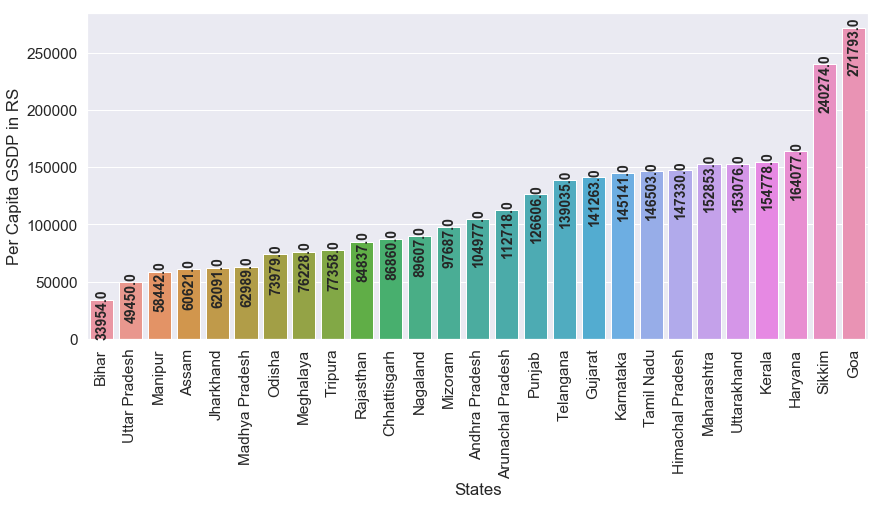

In [501]:
#Setting figure Size
plt.figure(figsize=(14,6))
sns.set(font_scale = 1.4)

#plotting the required chart with states on x axis and per capita gdp on y axis
ax=sns.barplot(x=gsdp_per_cap.index,y=gsdp_per_cap["Per Capita GSDP (Rs.)"])

#Annotating bar chart
for i in ax.patches:
    ax.text(i.get_x()+.2, i.get_height()+2.1,str(i.get_height()), fontsize=14,rotation=90,weight="bold")

plt.xlabel("States")
plt.ylabel("Per Capita GSDP in RS")
#Rotating x labels so that they dont overlap
plt.xticks(rotation=90)
plt.show()

<h2>Observations</h2>
<ul>
    <li>The top 5 states in terms of GDP per capita are Goa,Sikkim,Haryana,Kerala,Uttarakhand</li>
    <li>The bottom 5 states are Bihar,Uttar Pradesh,Manipur,Assam,Jharkhand</li>
</ul>

In [444]:
#As part of the assignment we have to calculate the ratio of highest and lowest GDP per capita
#We have already sorted out the GSDP_per capita data frame based on GSDP values 
#So we just have to take the ratio of value present at index 0 and index -1 (represent first and last values) 

ratio=gsdp_per_cap.iloc[-1,0]/gsdp_per_cap.iloc[0,0]

In [445]:
ratio

8.004741709371503

<h2>Second Objective</h2>
<p>Our second objective is to plot percentage contribution of primary secondary and tertiary sectors as percentage of GSDP of each state </p>

<h2>Approach</h2>
<p>Instead of working on the original data frame data_1b we will create a copy of it named as df_1b.This is done because we may have to drop some columns and change some values.So instead of losing the original data frame we create a copy of it  

In [446]:
#Creating a cpy of original data with index as items
df_1b=data_1b.set_index("Item")
df_1b.head()


,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jharkhand,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttarakhand,Uttar Pradesh
Item,,,,,,,,,,,,,,,,,,,,,
"Agriculture, forestry and fishing",14819416.0,686117.0,3855548.0,7951890.0,3948847.0,308507.0,13769969.0,8015238.0,1514981.0,3211065.0,...,607897.0,6422978.0,9285716.0,15044394.0,137447.0,13064238.0,7591501.0,799825.0,1601423.0,25097754.0
Crops,7893514.0,415520.0,2890544.0,4688237.0,2613371.0,140421.0,9671086.0,4636731.0,853758.0,2094466.0,...,375825.0,4382636.0,5690972.0,7673441.0,114976.0,7297820.0,4162493.0,397591.0,866146.0,16215212.0
Livestock,4309078.0,38387.0,173478.0,2060296.0,352208.0,30141.0,2698910.0,2916173.0,110304.0,562503.0,...,123800.0,788243.0,2638842.0,5356257.0,17338.0,4693361.0,2951299.0,88176.0,391188.0,7096876.0
Forestry and logging,346160.0,224017.0,261987.0,550132.0,597785.0,15744.0,761616.0,352254.0,540950.0,445149.0,...,99802.0,791463.0,848245.0,1956660.0,4529.0,392705.0,210741.0,145096.0,339293.0,1404936.0
Fishing and aquaculture,2270664.0,8193.0,529539.0,653224.0,385483.0,122201.0,638357.0,110080.0,9968.0,108947.0,...,8470.0,460636.0,107657.0,58036.0,604.0,680352.0,266968.0,168961.0,4796.0,380730.0


In [447]:
#Transposing so that we get state names as rows
df_1b=df_1b.transpose()
df_1b.head(2)

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.)
Andhra Pradesh,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,...,4405409.0,2200897.0,4215389.0,22032942.0,48825542.0,5512100.0,1690800.0,52646842.0,501510.0,104977.0
Arunachal Pradesh,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,147842.0,...,48418.0,243867.0,218728.0,631844.0,1636292.0,70099.0,30272.0,1676119.0,14870.0,112718.0


In [448]:
#CAlculating Primary,Secondary and Tertiary Percentages 
#storing them in new column named as Primary_Percent,Secondary_Percent,Tertiary_Percent 

#Dividing value of primary column with Gross State Domestic Product column and multiplying by 100 to get percent
df_1b.loc[:,"Primary_Percent"]=100*df_1b.loc[:,"Primary"]/df_1b.loc[:,"Gross State Domestic Product"]

#Dividing value of Secondary column with Gross State Domestic Product column and multiplying by 100 to get percent
df_1b.loc[:,"Secondary_Percent"]=100*df_1b.loc[:,"Secondary"]/df_1b.loc[:,"Gross State Domestic Product"]

#Dividing value of Tertiary column with Gross State Domestic Product column and multiplying by 100 to get percent
df_1b.loc[:,"Tertiary_Percent"]=100*df_1b.loc[:,"Tertiary"]/df_1b.loc[:,"Gross State Domestic Product"]
df_1b.head(2)

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Primary_Percent,Secondary_Percent,Tertiary_Percent
Andhra Pradesh,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,...,22032942.0,48825542.0,5512100.0,1690800.0,52646842.0,501510.0,104977.0,30.968080,19.923102,41.850453
Arunachal Pradesh,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,147842.0,...,631844.0,1636292.0,70099.0,30272.0,1676119.0,14870.0,112718.0,42.774946,17.152064,37.696846


In [449]:
#Rounding of all values to 2 decimal places
df_1b=df_1b.apply(lambda x:round(x,2))
df_1b.head(2)

Item,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,...,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Primary_Percent,Secondary_Percent,Tertiary_Percent
Andhra Pradesh,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,4664889.0,...,22032942.0,48825542.0,5512100.0,1690800.0,52646842.0,501510.0,104977.0,30.97,19.92,41.85
Arunachal Pradesh,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,147842.0,...,631844.0,1636292.0,70099.0,30272.0,1676119.0,14870.0,112718.0,42.77,17.15,37.70


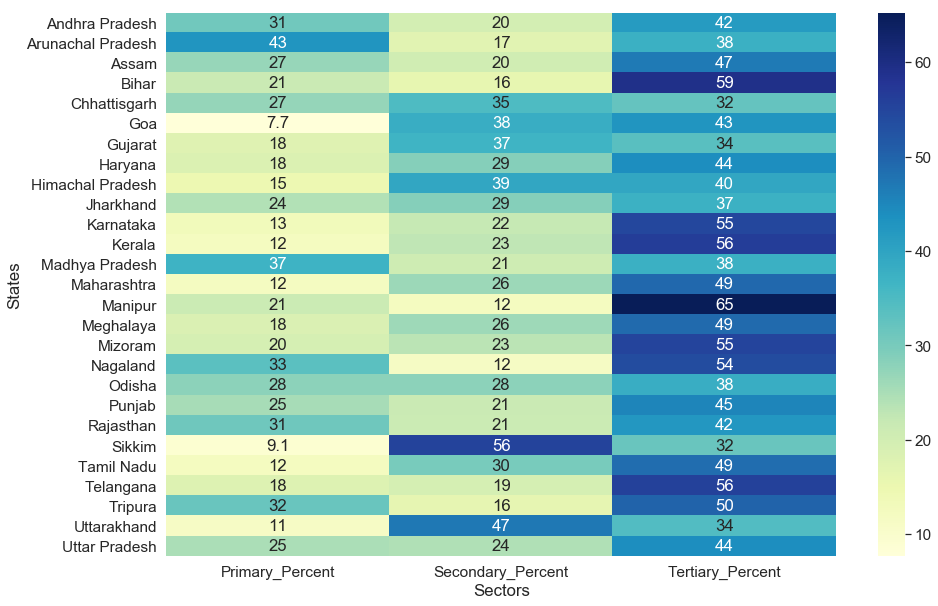

In [450]:
#Plotting percentage contribution state wise

#Setting figure size
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")

#Setting font size for better readibility
sns.set(font_scale = 1.4)
#Plotting Heat map
sns.heatmap(df_1b.loc[:,["Primary_Percent","Secondary_Percent","Tertiary_Percent"]],cmap="YlGnBu",annot=True)
plt.ylabel("States")
plt.xlabel("Sectors")
plt.show()

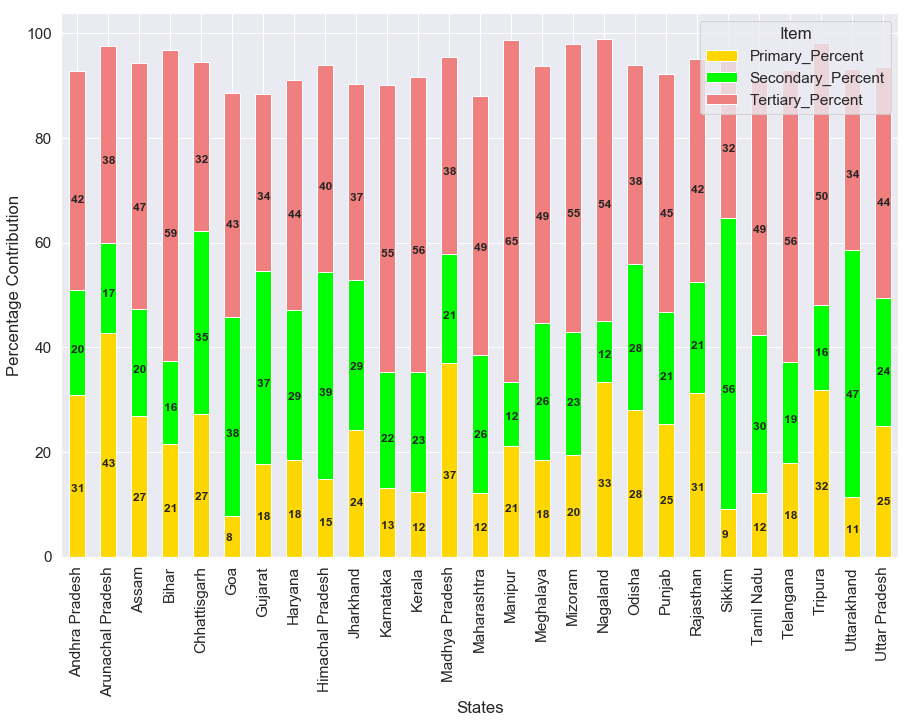

In [451]:
#plotting stacked bar charts for more insight
ax=df_1b.loc[:,['Primary_Percent','Secondary_Percent', 'Tertiary_Percent']].plot.bar(stacked=True, figsize=(15,10),color=["gold","lime","lightcoral"])

#Annotating bar graph
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f} '.format(height), (p.get_x()+.15*width, p.get_y()+.4*height),fontsize=12,weight="bold")
#Setting Xlabel and ylabel
plt.xlabel("States")
plt.ylabel("Percentage Contribution")
plt.show()


<h2>Third Objective</h2>
<ul><li>We have to categorize states in four categories c1,c2,c3,c4 based on their percentile values.</li>
<li>Once the categorization is done we have to perform analysis based on new data.</li><li>We have to find sub sectors which contribute to approx 80% of GSDP of each category.</li><li>PLot percentage contribution of subsectors for each category

<h2>Approach</h2>
<ul>
    <li>To categorise the states we will use the qcut function.</li>
    <li>We will make a new column category in data_1b which would contain category of each state.</li>
<li>Then we will use pivot table to create a category dataframe cat_df which will contain categories as rows as sector names as columns.</li>
    <li>Then we will calculate subsectors which contribute to aprox 80 % of GSDP in each Category</li>
</ul>

In [452]:
#Creating a category column using qcut
df_1b["Category"]=pd.qcut(df_1b["Per Capita GSDP (Rs.)"],[0.0,0.2,0.5,0.85,1.0],labels=["c4","c3","c2","c1"])

In [453]:
#Using pivot tables to aggregate values based on category.The aggregagte function used here is sum
cat_df=pd.pivot_table(df_1b, index=df_1b["Category"], aggfunc='sum')
cat_df

Item,"Agriculture, forestry and fishing",Air transport,Communication & services related to broadcasting,Construction,Crops,"Electricity, gas, water supply & other utility services",Financial services,Fishing and aquaculture,Forestry and logging,Gross State Domestic Product,...,Storage,Subsidies on products,TOTAL GSVA at basic prices,Taxes on Products,Tertiary,Tertiary_Percent,Trade & repair services,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Water transport
Category,,,,,,,,,,,,,,,,,,,,,
c4,56735044.0,116154.0,4462395.0,22775948.0,39331055.0,4310264.0,7684498.0,1828960.0,3673623.0,233252066.0,...,221940.0,8459602.0,219788780.0,21922888.00,104884072.0,290.66,25581239.0,27484595.0,16191800.0,7411.0
c3,42226888.0,58970.0,3050206.0,15707921.0,23676317.0,4604774.0,5766226.0,3368881.0,4045895.0,177966387.0,...,75393.0,6779982.0,167623415.0,17122953.00,72209729.0,363.04,15953349.0,17245309.0,12231484.0,145480.0
c2,75209022.0,659841.0,9408861.0,40653562.0,47550095.0,13823378.0,36296642.0,2691822.0,5603213.0,586380452.0,...,368515.0,13005659.0,527484069.0,71902042.04,278228231.0,399.74,55252334.0,61238862.0,33749808.0,318192.0
c1,14391809.0,171388.0,1420517.0,11264451.0,7962514.0,2000998.0,3936489.0,937204.0,872335.0,101930677.0,...,18106.0,1970502.0,93126678.0,10774501.00,51121666.0,174.90,12989747.0,13995159.0,6818560.0,44776.0


Now our category dataframe is complete we have to find out a list of subsectors.
We will create the list of subsectors by comparing a list of numbers [1,20] with S.No. of data_1b.This will give us a list of subsectors because integral sno represent subsectors 

In [454]:
data_1b

,Item,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttarakhand,Uttar Pradesh
S.No.,,,,,,,,,,,,,,,,,,,,,
1,"Agriculture, forestry and fishing",14819416.0,686117.0,3855548.0,7951890.0,3948847.0,308507.0,13769969.00,8015238.0,1514981.0,...,607897.0,6422978.0,9285716.0,15044394.0,137447.0,13064238.0,7591501.0,799825.0,1601423.0,25097754.0
1.1,Crops,7893514.0,415520.0,2890544.0,4688237.0,2613371.0,140421.0,9671086.00,4636731.0,853758.0,...,375825.0,4382636.0,5690972.0,7673441.0,114976.0,7297820.0,4162493.0,397591.0,866146.0,16215212.0
1.2,Livestock,4309078.0,38387.0,173478.0,2060296.0,352208.0,30141.0,2698910.00,2916173.0,110304.0,...,123800.0,788243.0,2638842.0,5356257.0,17338.0,4693361.0,2951299.0,88176.0,391188.0,7096876.0
1.3,Forestry and logging,346160.0,224017.0,261987.0,550132.0,597785.0,15744.0,761616.00,352254.0,540950.0,...,99802.0,791463.0,848245.0,1956660.0,4529.0,392705.0,210741.0,145096.0,339293.0,1404936.0
1.4,Fishing and aquaculture,2270664.0,8193.0,529539.0,653224.0,385483.0,122201.0,638357.00,110080.0,9968.0,...,8470.0,460636.0,107657.0,58036.0,604.0,680352.0,266968.0,168961.0,4796.0,380730.0
2,Mining and quarrying,1484300.0,30842.0,1471149.0,68107.0,2451970.0,3622.0,2117218.00,25186.0,33385.0,...,8280.0,2586328.0,10354.0,4069385.0,1329.0,265536.0,1541853.0,142391.0,244549.0,901501.0
Total,Primary,16303716.0,716959.0,5326697.0,8019997.0,6400817.0,312129.0,15887187.00,8040424.0,1548366.0,...,616178.0,9009306.0,9296070.0,19113780.0,138776.0,13329774.0,9133354.0,942216.0,1845972.0,25999255.0
3,Manufacturing,4672266.0,26120.0,2002936.0,2189965.0,4370593.0,1177608.0,24087538.00,7756921.0,2543637.0,...,18346.0,5754229.0,4790341.0,6552580.0,550697.0,18914794.0,6353711.0,228625.0,5866252.0,12261649.0
4,"Electricity, gas, water supply & other utility...",1151729.0,113527.0,296587.0,345168.0,1198438.0,204110.0,3409983.00,1101919.0,767268.0,...,37944.0,833067.0,911611.0,1122888.0,212499.0,1710379.0,716266.0,77870.0,433880.0,2030625.0


In [455]:
numlist=np.arange(1,20)
numlist=[str(i) for i in numlist]
numlist

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19']

In [456]:
#Made a copy of master data frame
temp=data_1b

#Creating a column S.No. with values same as S.NO(now index of data_1b).
#This is done because earlier we made this as index and thus dropped it as column
temp["S.No."]=data_1b.index

#Extract only those values which are in numlist.
#Only rows with integral S.NO will be extracted
temp=temp.loc[temp["S.No."].isin(numlist),: ]
temp

,Item,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttarakhand,Uttar Pradesh,S.No.
S.No.,,,,,,,,,,,,,,,,,,,,,
1,"Agriculture, forestry and fishing",14819416.0,686117.0,3855548.0,7951890.0,3948847.0,308507.0,13769969.00,8015238.0,1514981.0,...,6422978.0,9285716.0,15044394.0,137447.0,13064238.0,7591501.0,799825.0,1601423.0,25097754.0,1
2,Mining and quarrying,1484300.0,30842.0,1471149.0,68107.0,2451970.0,3622.0,2117218.00,25186.0,33385.0,...,2586328.0,10354.0,4069385.0,1329.0,265536.0,1541853.0,142391.0,244549.0,901501.0,2
3,Manufacturing,4672266.0,26120.0,2002936.0,2189965.0,4370593.0,1177608.0,24087538.00,7756921.0,2543637.0,...,5754229.0,4790341.0,6552580.0,550697.0,18914794.0,6353711.0,228625.0,5866252.0,12261649.0,3
4,"Electricity, gas, water supply & other utility...",1151729.0,113527.0,296587.0,345168.0,1198438.0,204110.0,3409983.00,1101919.0,767268.0,...,833067.0,911611.0,1122888.0,212499.0,1710379.0,716266.0,77870.0,433880.0,2030625.0,4
5,Construction,4664889.0,147842.0,1733568.0,3449763.0,2669855.0,165819.0,5526017.00,3702571.0,808256.0,...,2402396.0,2202962.0,5353326.0,82058.0,12216718.0,2854024.0,177899.0,1342733.0,11256450.0,5
6,"Trade, repair, hotels and restaurants",4233400.0,60421.0,2987155.0,7448373.0,1535571.0,380927.0,10178713.00,4986319.0,615496.0,...,3149555.0,4419919.0,7297290.0,70568.0,12895842.0,6494607.0,390423.0,1743106.0,9437243.0,6
7,"Transport, storage, communication & services r...",5076984.0,35203.0,1194568.0,3147173.0,871770.0,189656.0,4555910.00,2560623.0,552234.0,...,2034016.0,1951809.0,3814461.0,47347.0,7188320.0,3604741.0,155956.0,1066693.0,7404509.0,7
8,Financial services,1900863.0,25207.0,543651.0,1178022.0,739057.0,233618.0,4606644.00,1671486.0,362521.0,...,1065147.0,2057520.0,1827413.0,21079.0,5598498.0,3023729.0,86094.0,385030.0,3392275.0,8
9,"Real estate, ownership of dwelling & professio...",4405409.0,48418.0,1412466.0,3740641.0,2462166.0,407099.0,5179502.00,6970183.0,1125937.0,...,2348714.0,3142786.0,6451997.0,75330.0,16830213.0,9478839.0,190704.0,831307.0,14548185.0,9


In [457]:
#On examining the data frame we realized there are a few other values we need to drop.
#We require only values with S.no from 1 to 11 and 15
#So we drop the rest of columns
temp=temp.iloc[[0,1,2,3,4,5,6,7,8,9,10,14],:]

In [458]:
temp

,Item,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttarakhand,Uttar Pradesh,S.No.
S.No.,,,,,,,,,,,,,,,,,,,,,
1,"Agriculture, forestry and fishing",14819416.0,686117.0,3855548.0,7951890.0,3948847.0,308507.0,13769969.0,8015238.0,1514981.0,...,6422978.0,9285716.0,15044394.0,137447.0,13064238.0,7591501.0,799825.0,1601423.0,25097754.0,1
2,Mining and quarrying,1484300.0,30842.0,1471149.0,68107.0,2451970.0,3622.0,2117218.0,25186.0,33385.0,...,2586328.0,10354.0,4069385.0,1329.0,265536.0,1541853.0,142391.0,244549.0,901501.0,2
3,Manufacturing,4672266.0,26120.0,2002936.0,2189965.0,4370593.0,1177608.0,24087538.0,7756921.0,2543637.0,...,5754229.0,4790341.0,6552580.0,550697.0,18914794.0,6353711.0,228625.0,5866252.0,12261649.0,3
4,"Electricity, gas, water supply & other utility...",1151729.0,113527.0,296587.0,345168.0,1198438.0,204110.0,3409983.0,1101919.0,767268.0,...,833067.0,911611.0,1122888.0,212499.0,1710379.0,716266.0,77870.0,433880.0,2030625.0,4
5,Construction,4664889.0,147842.0,1733568.0,3449763.0,2669855.0,165819.0,5526017.0,3702571.0,808256.0,...,2402396.0,2202962.0,5353326.0,82058.0,12216718.0,2854024.0,177899.0,1342733.0,11256450.0,5
6,"Trade, repair, hotels and restaurants",4233400.0,60421.0,2987155.0,7448373.0,1535571.0,380927.0,10178713.0,4986319.0,615496.0,...,3149555.0,4419919.0,7297290.0,70568.0,12895842.0,6494607.0,390423.0,1743106.0,9437243.0,6
7,"Transport, storage, communication & services r...",5076984.0,35203.0,1194568.0,3147173.0,871770.0,189656.0,4555910.0,2560623.0,552234.0,...,2034016.0,1951809.0,3814461.0,47347.0,7188320.0,3604741.0,155956.0,1066693.0,7404509.0,7
8,Financial services,1900863.0,25207.0,543651.0,1178022.0,739057.0,233618.0,4606644.0,1671486.0,362521.0,...,1065147.0,2057520.0,1827413.0,21079.0,5598498.0,3023729.0,86094.0,385030.0,3392275.0,8
9,"Real estate, ownership of dwelling & professio...",4405409.0,48418.0,1412466.0,3740641.0,2462166.0,407099.0,5179502.0,6970183.0,1125937.0,...,2348714.0,3142786.0,6451997.0,75330.0,16830213.0,9478839.0,190704.0,831307.0,14548185.0,9


In [459]:
#Now that we have a list of subsectors in items column so lets extract it
lst_subsec=list(temp.Item.values)

In [460]:
#Now lets filter out our category column and make it cntain only sub sectors
cat_df=cat_df.loc[:,lst_subsec]
cat_df.head()

Item,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, water supply & other utility services",Construction,"Trade, repair, hotels and restaurants","Transport, storage, communication & services related to broadcasting",Financial services,"Real estate, ownership of dwelling & professional services",Public administration,Other services,Gross State Domestic Product
Category,,,,,,,,,,,,
c4,56735044.0,6096419.0,24987032.0,4310264.0,22775948.0,27484595.0,16191800.0,7684498.0,24177534.0,13486630.0,15859015.0,233252066.0
c3,42226888.0,10835771.0,22038331.0,4604774.0,15707921.0,17245309.0,12231484.0,5766226.0,16224118.0,7927173.0,12815417.0,177966387.0
c2,75209022.0,10373346.0,109196530.0,13823378.0,40653562.0,61238862.0,33749808.0,36296642.0,92121446.0,18567815.0,36253657.0,586380452.0
c1,14391809.0,588961.0,13758793.0,2000998.0,11264451.0,13995159.0,6818560.0,3936489.0,14740245.0,3571292.0,8059922.0,101930677.0


In [461]:
#Transposing category df
cat_df=cat_df.transpose()
cat_df.head()

Category,c4,c3,c2,c1
Item,,,,
"Agriculture, forestry and fishing",56735044.0,42226888.0,75209022.0,14391809.0
Mining and quarrying,6096419.0,10835771.0,10373346.0,588961.0
Manufacturing,24987032.0,22038331.0,109196530.0,13758793.0
"Electricity, gas, water supply & other utility services",4310264.0,4604774.0,13823378.0,2000998.0
Construction,22775948.0,15707921.0,40653562.0,11264451.0


In [462]:
#NOw lets create a new data frame which will contain percentage contribution of all subsectors present in category dataframe

#we are dividing each category column with respective GSDP value to calculate percentage 
perc_cat_df=100*cat_df/cat_df.loc["Gross State Domestic Product",:]

In [463]:
perc_cat_df

Category,c4,c3,c2,c1
Item,,,,
"Agriculture, forestry and fishing",24.323490,23.727451,12.825977,14.119213
Mining and quarrying,2.613661,6.088662,1.769047,0.577805
Manufacturing,10.712459,12.383423,18.622130,13.498187
"Electricity, gas, water supply & other utility services",1.847900,2.587440,2.357408,1.963097
Construction,9.764521,8.826341,6.932967,11.051090
"Trade, repair, hotels and restaurants",11.783216,9.690206,10.443537,13.730076
"Transport, storage, communication & services related to broadcasting",6.941761,6.872918,5.755616,6.689409
Financial services,3.294504,3.240065,6.189947,3.861928
"Real estate, ownership of dwelling & professional services",10.365410,9.116395,15.710184,14.461049


In [464]:
#NOw we dont need GSDP row we can drop it
perc_cat_df=perc_cat_df.drop("Gross State Domestic Product",axis=0)

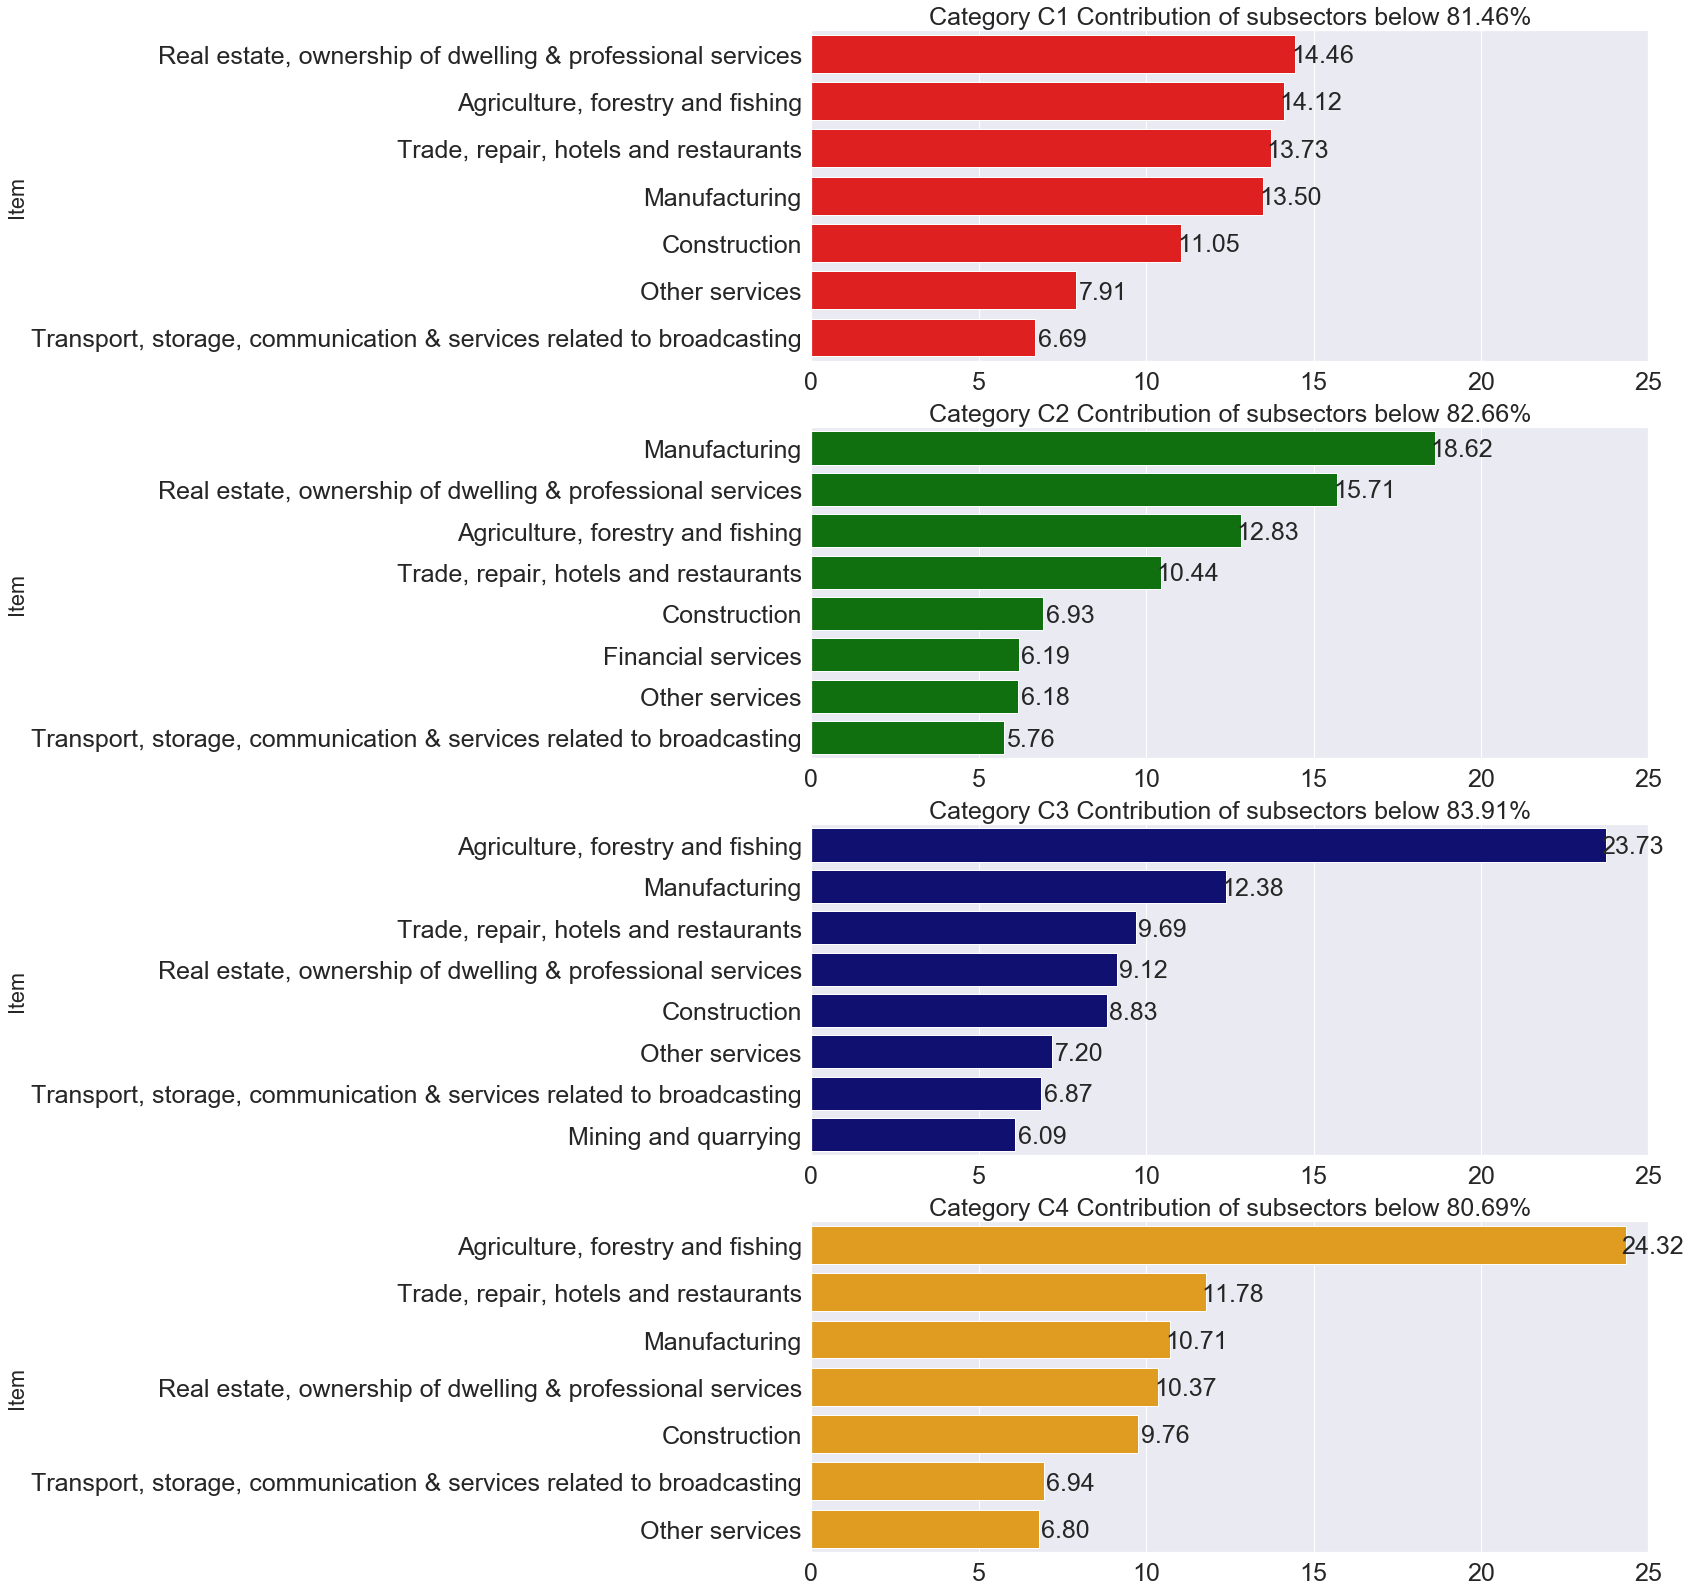

In [504]:
#Calculating subsectors which make upto 80 % and plotting them

#list of categories
cat_list=["c1","c2","c3","c4"]
clr=["red","green","navy","orange"]
#Counter variable for subplots
k=1

#Setting fiure size
plt.figure(figsize=(15,28))

#The following for loop will extract the columns mentioned in cat_list from perc_cat_df and
#then sort each column based descending order.Once sorted t will continue to add percentage 
#Till it reaches atleast 80
for i in cat_list:
    #Temp stores each category column
    temp=perc_cat_df.loc[:,i]
    #Sorting of the category column
    temp=temp.sort_values(ascending=False)
    #Sumc represents the percentage sum of sum categories and ind is a counter variable  
    sumc=ind=0
    
    #For loop to calculate sum till sumc reaches atleast 80
    for j in range(0,12):
        sumc=sumc+temp[j]
        if sumc>80:
            ind=j
            sumc=sumc
            sumc=round(sumc,2)
            temp=temp[:ind+1]
            break
    #Plotting the graph in subplots
    plt.subplot(4,1,k)
    #Setting grid style
    sns.set_style("darkgrid")
    #Setting font scale for better readibility
    sns.set(font_scale = 1.8)
    
    #Setting title of each subplot
    plt.title("Category "+str(i).upper()+" Contribution of subsectors below "+str(sumc)+"%",fontsize=25)
    #plotting the bar graph
    ax=sns.barplot(x=temp.values, y=temp.index,color=clr[k-1])
    #Setting x axis scale so that it remains same for all categories
    plt.xlim([0,25])
    #Setting label size
    ax.tick_params(axis='both', which='major', labelsize=25)
    
    #Annotating bar char
    for p in ax.patches:
        width = p.get_width()
        plt.text(.8+p.get_width(), p.get_y()+0.55*p.get_height(),'{:1.2f}'.format(width),ha='center', va='center',fontsize=25)
    #Increamenting subplot counter variable
    k=k+1

<h1>Points to ponder</h1>
<br><b>Q1.How does the GDP distribution of top states differ from others?</b><br>
On careful examination we have noticed that top states have uniform distribution of percentage in subsectors i.e They have all the subsectors contributing to the GSDP equally or we can say uniformly.States in c4 categories have some sub sectors contributing very large amount while other sub sectors fall behind.This in turn reduces the overall GSDP.So we can conclude from that the <b>Top tier states have all subsectors contributing to GSDP uniformly</b> 

<br><br>
<b>Q2.Which subsectors are corelated with high GDP?</b>
<br>Sectors with high gdp corelation include<ul> <li>Agriculture,forestry and fishing</li>
    <li>Trade Repair and restraunts</li>
    <li>Real estate ownership of dewelling & professional construction</li><li>Manufacturing </li></ul>
<br><br>
<b>Q3.Which subsectors do various need to focus on?</b>
Sectors which contribute  low GSDP must be focus of each category <ul> <li>C1 must focus on subsectors like other services, Transport,storage,communication</li>
    <li>C2 must focus on construction,financial services, other services, Transport,storage,communication</li>
    <li>C3 and C4 must improve mining, other services, Transport,storage,communication</li>  </ul>

<h1>Insights in each Category</h1>

<h2>Insights in category C1</h2>
<br><p>C1 category states have very balanced contribution of subsectors.
Subsectors contributes around 14% to total GSDP which is very impressive.However there are two subsectors like transport and otherservices which do need attention.Their contribution to total GSDP is 6% which is even less than 50% of what other subsectors are contributing.Additionally we can also say that in category C1 there are high percentage contributing subsectors from all primary,secondary,tertiary sectors </p>
<h3>Recomendations</h3>
1.Development in subsectors such as otherservices and transport can greatly increase per capita GDP <br>
2.The contribution of sub sectors mentioned above should improve so that they atleast contribute equal to 14 %.<br>
3.The contribution of secondry sectors is low the states in C1 shouldfocus on it 

<h2>Insights in category C2</h2>
<br><p>Compared to C1 C2 category has a varying contribution of subsectors.
There are subsectors like manufacturing and real estate which contribute to 18.6% and 15.7% which is much higher than their contribution in C1 category but still the overall GSDP of these states is low.This is because there are subsectors whose contribution to GSDP is very low which in turn lowers the whole GSDP of this category states.</p>
<h3>Recomendations</h3>
1.Development in subsectors such as financial services and construction can greatly increase per capita GDP <br>
<br>
2.C2 category should focus their attention to primary and tertiary sectors  

<h2>Insights in category C3</h2>
<br><p>In this category while agriculture and forestry contributes to a whooping 25% but all the other subsectors contribute even less that 10%.The problem lies with putting all attention and efforts in one sector and reducing the efforts in others.The government should pursue their efforts equally.Additionally it is also seen that contribution of Tertiary subsectors is very low   </p>
<h3>Recomendations</h3>
1.Development in subsectors such as transport and construction can greatly increase per capita GDP 
<br>
2.C3 category should focus their attention to secondry and tertiary sectors.
<br>
3.More attention is needed to Tertiary subsectors than secondary as none of its subsector contribute even half of Agriculture

<h2>Insights in category C4</h2>
<br><p>Contribution of primary subsectors is 25% which is impressive however other subsectors lag a lot.The difference of % contribution of other subsectors is evident from the bar chart </p>
<h3>Recomendations</h3>
1.Development in subsectors such as Transport can greatly increase per capita GDP <br>
2.C4 category should focus their attention to secondary and tertiary sectors with an emphasis on secondary sectors. 

<h1>Assignment Part 2</h1>

<h2>Objectives</h2>
<ul>
<li>Analyse if there is any corelation between GDP per capita and drop out rates in education(Primary,Upper Primary,Secondry)</li>
</ul>

<h2>Approach</h2>
    <ul><li>We will first the drop out read data and merge it with the data we have from part 1b which contains GDP per capita.Merging will be done on state names</li>
    <li>Once done we will drop the irrevalent columns</li>
    <li>After that we will create a corelatio matrix and plot it</li>
    </ul>

In [488]:
#Reading data
drop_rate=pd.read_csv(cwd+"\\data\\2\\2.csv")
drop_rate.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [489]:
#Setting indx as state names
drop_rate=drop_rate.set_index("Level of Education - State")
#Sno is not needed so we are dropping it
drop_rate=drop_rate.drop("Sl. No.",axis=1)
#Correcting name some some states so that no problem while merging
drop_rate=drop_rate.rename(index={'Chhatisgarh':'Chhattisgarh','Uttrakhand':'Uttarakhand'})
#Extracting the columns needed for analysis
drop_rate=drop_rate.iloc[:,[1,5,8]]

In [490]:
drop_rate

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
Level of Education - State,,,
A & N Islands,1.21,1.69,9.870
Andhra Pradesh,4.35,5.20,15.710
Arunachal Pradesh,10.89,6.71,17.110
Assam,7.44,10.51,27.060
Bihar,2.09,4.08,25.900
Chandigarh,NaN,0.44,NaN
Chhattisgarh,1.42,5.85,21.260
Dadra & Nagar Haveli,1.57,4.02,16.770
Daman & Diu,0.85,3.11,32.270


In [493]:
#Doing an inner merge on drop out rate data and data_1b where we have GDP per capita
drop_rate=df_1b.merge(drop_rate,left_on=df_1b.index,right_on=drop_rate.index)

In [495]:
drop_rate.head()

,key_0,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility services",...,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Primary_Percent,Secondary_Percent,Tertiary_Percent,Category,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015
0,Andhra Pradesh,14819416.0,7893514.0,4309078.0,346160.0,2270664.0,1484300.0,16303716.0,4672266.0,1151729.0,...,52646842.0,501510.0,104977.0,30.97,19.92,41.85,c3,4.35,5.20,15.71
1,Arunachal Pradesh,686117.0,415520.0,38387.0,224017.0,8193.0,30842.0,716959.0,26120.0,113527.0,...,1676119.0,14870.0,112718.0,42.77,17.15,37.70,c2,10.89,6.71,17.11
2,Assam,3855548.0,2890544.0,173478.0,261987.0,529539.0,1471149.0,5326697.0,2002936.0,296587.0,...,19809800.0,326780.0,60621.0,26.89,20.36,46.98,c4,7.44,10.51,27.06
3,Bihar,7951890.0,4688237.0,2060296.0,550132.0,653224.0,68107.0,8019997.0,2189965.0,345168.0,...,37391988.0,1101240.0,33954.0,21.45,16.01,59.32,c4,2.09,4.08,25.90
4,Chhattisgarh,3948847.0,2613371.0,352208.0,597785.0,385483.0,2451970.0,6400817.0,4370593.0,1198438.0,...,23498180.0,270530.0,86860.0,27.24,35.06,32.30,c3,1.42,5.85,21.26


In [497]:
#Setting index as states names
drop_rate.set_index("key_0",inplace=True)
drop_rate.index.name="States"

In [499]:
#Extracting required data and Creating a corelation matrix
cordf=drop_rate.loc[:,["Primary - 2014-2015","Upper Primary - 2014-2015","Secondary - 2014-2015","Per Capita GSDP (Rs.)"]]
cordf = cordf.corr()
cordf=round(cordf, 3)

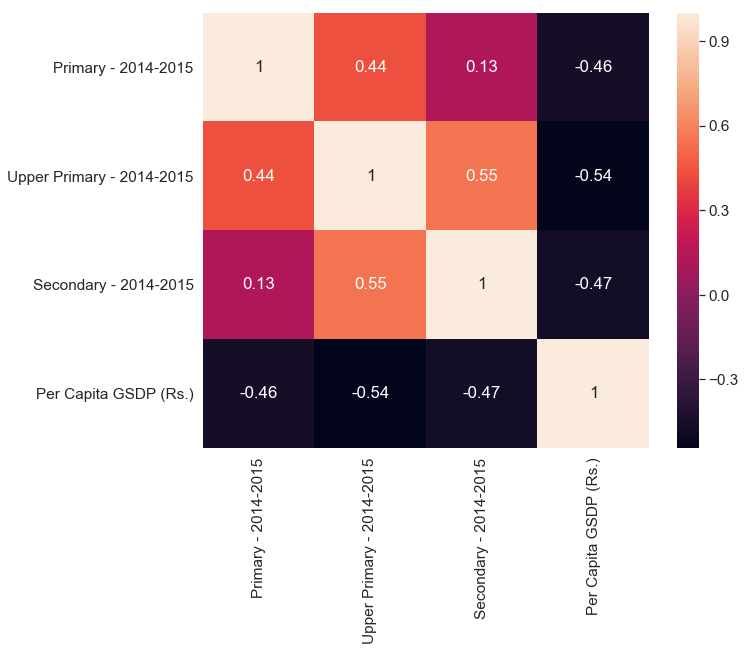

In [500]:
#Plotting the corelation matrix using heat map
plt.figure(figsize=(10,8))
sns.set(font_scale = 1.4)
sns.heatmap(cordf,annot=True)
plt.show()

<h1>Observation</h1>
<p>The corelation between drop out rates and Per capita GDP is negative.Which means higher drop out rates lower per capita GDP.This makes sense because high drop out rates mean low skilled labour thus affecting GDP.
    We can also say that since corelation between upper primary and per capita is highest therefore if Upper primary drop out rateshave highest impact on per capita GSDP

In [ ]:
drop